#Theory

1. What is Support Vector Machine (SVM)?
 - SVM is a supervised machine-learning algorithm used for classification and regression. It finds the best separating line or hyperplane that divides the classes with the maximum margin. Points that lie closest to the boundary are called support vectors — they define the decision boundary.

2. What is the main objective of SVM?
 - The main goal is to find a hyperplane that maximizes the margin between different classes.
Larger margin → better generalization → more accurate model on unseen data.

3. What is a Hyperplane?
 - A hyperplane is a decision boundary that separates data points of different classes.

In 2D → it’s a line

In 3D → it’s a plane

In n-dimensions → it’s an n-1 dimensional surface

4. What is the margin in SVM and why is it important?
 - The margin is the distance between the hyperplane and the nearest data points of each class (support vectors).
A large margin means the model is less likely to overfit and can classify new data more accurately.

5. Differentiate between Hard Margin and Soft Margin SVM.
 - | Type            | Description                                                     | Use Case                   |
| --------------- | --------------------------------------------------------------- | -------------------------- |
| **Hard Margin** | No misclassification allowed – data must be perfectly separable | Only for clean datasets    |
| **Soft Margin** | Allows some misclassification for better generalization         | Works well with noisy data |


6. What is the Kernel Trick in SVM?
 - Kernel Trick maps non-linear data into a higher-dimensional space so that it can be separated by a linear hyperplane.
Common kernels: Linear, Polynomial, RBF (Gaussian), Sigmoid.

7. Difference between Linear SVM and Non-Linear SVM.
 - | Type               | Kernel         | Decision Boundary                |
| ------------------ | -------------- | -------------------------------- |
| **Linear SVM**     | Linear Kernel  | Straight line/plane              |
| **Non-Linear SVM** | RBF/Polynomial | Curved boundary for complex data |


8. List advantages and disadvantages of SVM.

- ✅ Advantages:

Works well for high-dimensional data

Memory efficient (using support vectors only)

Robust to overfitting (with proper C and kernel)

❌ Disadvantages:

Slower on large datasets

Needs kernel and parameter tuning

Hard to interpret for non-linear cases

9. What is Naïve Bayes Classifier?
 - It’s a probabilistic algorithm based on Bayes’ Theorem and the assumption that features are independent.
It calculates the probability of each class given the input features and chooses the class with the highest posterior probability.

10. Explain Bayes’ Theorem.

 - 𝑃
(
𝐴
∣
𝐵
)
=
𝑃
(
𝐵
∣
𝐴
)

𝑃
(
𝐴
)
𝑃
(
𝐵
)
P(A∣B)=
P(B)
P(B∣A)P(A)
	​


Where:

𝑃
(
𝐴
∣
𝐵
)
P(A∣B): Posterior (probability of A given B)

𝑃
(
𝐵
∣
𝐴
)
P(B∣A): Likelihood

𝑃
(
𝐴
)
P(A): Prior

𝑃
(
𝐵
)
P(B): Evidence

11. Why is it called “Naïve”?
 - Because it assumes all features are independent of each other — which is rare in real data, but the model still performs surprisingly well.

12. Types of Naïve Bayes Classifiers.

1. Gaussian NB – for continuous numeric data (normal distribution)

2. Multinomial NB – for count features (like text classification)

3. Bernoulli NB – for binary features (yes/no type data)

13. Difference between SVM and Naïve Bayes.
 - | Feature        | SVM                      | Naïve Bayes                |
| -------------- | ------------------------ | -------------------------- |
| Type           | Discriminative           | Probabilistic (Generative) |
| Output         | Boundary between classes | Probability of class       |
| Works well for | Continuous data          | Categorical / text         |
| Training Time  | Slower                   | Very fast                  |


14. Applications of SVM and Naïve Bayes.

 - SVM: Image classification, spam detection, bioinformatics, face recognition

Naïve Bayes: Email spam filtering, sentiment analysis, document classification, medical diagnosis

15. Advantages and limitations of Naïve Bayes.

 - ✅ Advantages:

Simple and fast

Works well with small datasets

Great for text and categorical data

❌ Limitations:

Independence assumption rarely true

Performs poorly with correlated features

16. What is Overfitting and how do SVM and Naïve Bayes handle it?

 - Overfitting: When a model memorizes training data instead of learning patterns.

SVM: Uses soft margin and regularization parameter C to control complexity.

Naïve Bayes: Less prone to overfitting due to probabilistic nature and strong assumptions.

17. What is Regularization in SVM?
 - Regularization parameter C controls trade-off between maximizing margin and minimizing classification error.

Large C → focus on correct classification (may overfit)

Small C → wider margin (better generalization)

18. Explain the role of gamma in SVM.
 - Gamma defines how far the influence of a single training example reaches.

Small γ → smooth boundary

Large γ → tight fit to data (less generalization)

19. When should you prefer SVM over Naïve Bayes and vice-versa?

- | Case                                 | Best Algorithm  |
| ------------------------------------ | --------------- |
| Data is continuous and not too large | **SVM**         |
| Data is textual / categorical        | **Naïve Bayes** |
| You need fast baseline model         | **Naïve Bayes** |
| You need high accuracy with tuning   | **SVM**         |


In [1]:
#20 Implement a Linear SVM classifier on the Iris dataset and print accuracy.

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


iris = datasets.load_iris()
X, y = iris.data, iris.target


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


In [2]:
#21 Train SVM with Polynomial and RBF kernels and compare accuracies.

kernels = ['poly', 'rbf']
for k in kernels:
    clf = SVC(kernel=k, random_state=42)
    clf.fit(X_train, y_train)
    acc = accuracy_score(y_test, clf.predict(X_test))
    print(f"{k.capitalize()} Kernel Accuracy:", acc)


Poly Kernel Accuracy: 0.9555555555555556
Rbf Kernel Accuracy: 0.9555555555555556


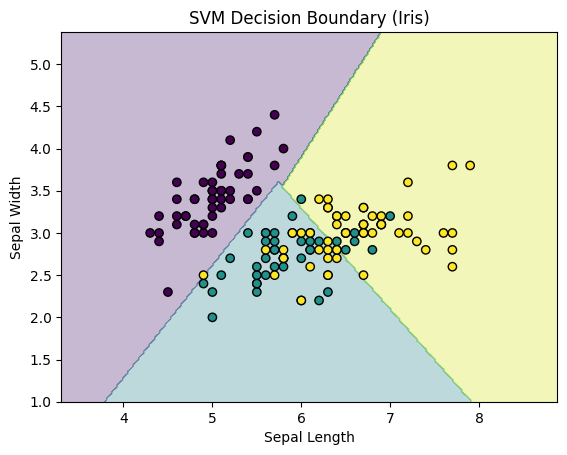

In [3]:
#22 Visualize decision boundaries of SVM for 2 features of Iris dataset.

import matplotlib.pyplot as plt
import numpy as np

# use first two features
X_2 = X[:, :2]
X_train, X_test, y_train, y_test = train_test_split(
    X_2, y, test_size=0.3, random_state=42, stratify=y
)

clf = SVC(kernel='linear', random_state=42)
clf.fit(X_train, y_train)

# grid for plot
x_min, x_max = X_2[:,0].min() - 1, X_2[:,0].max() + 1
y_min, y_max = X_2[:,1].min() - 1, X_2[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_2[:,0], X_2[:,1], c=y, edgecolors='k')
plt.title("SVM Decision Boundary (Iris)")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()


In [4]:
#23 Train Naïve Bayes (GaussianNB) on Iris dataset and check accuracy.

from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print("Naïve Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))


Naïve Bayes Accuracy: 0.6888888888888889


In [5]:
#24 Train Multinomial Naïve Bayes on text dataset (20 Newsgroups) and print accuracy.

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# load dataset
data = fetch_20newsgroups(subset='train', categories=['sci.space','comp.graphics'])
test_data = fetch_20newsgroups(subset='test', categories=['sci.space','comp.graphics'])

# vectorize text
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(data.data)
X_test = vectorizer.transform(test_data.data)

# train NB
clf = MultinomialNB()
clf.fit(X_train, data.target)

y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(test_data.target, y_pred))



Accuracy: 0.966794380587484


In [9]:
#25 Compare SVM and Naïve Bayes on same dataset using accuracy and confusion matrix.

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

# Load dataset
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Train SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Train Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# Evaluate both
svm_acc = accuracy_score(y_test, y_pred_svm)
nb_acc = accuracy_score(y_test, y_pred_nb)

print("SVM Accuracy:", svm_acc)
print("Naive Bayes Accuracy:", nb_acc)

# Confusion matrices
print("\nConfusion Matrix (SVM):\n", confusion_matrix(y_test, y_pred_svm))
print("\nConfusion Matrix (Naive Bayes):\n", confusion_matrix(y_test, y_pred_nb))


SVM Accuracy: 1.0
Naive Bayes Accuracy: 0.9111111111111111

Confusion Matrix (SVM):
 [[15  0  0]
 [ 0 15  0]
 [ 0  0 15]]

Confusion Matrix (Naive Bayes):
 [[15  0  0]
 [ 0 14  1]
 [ 0  3 12]]


In [10]:
#26 Compare SVM and Naïve Bayes using Precision, Recall, and F1-Score on Iris Dataset.

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# Load dataset
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Train SVM
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# Train Naïve Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print("=== SVM Classification Report ===")
print(classification_report(y_test, y_pred_svm))

print("=== Naive Bayes Classification Report ===")
print(classification_report(y_test, y_pred_nb))


=== SVM Classification Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

=== Naive Bayes Classification Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.82      0.93      0.88        15
           2       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



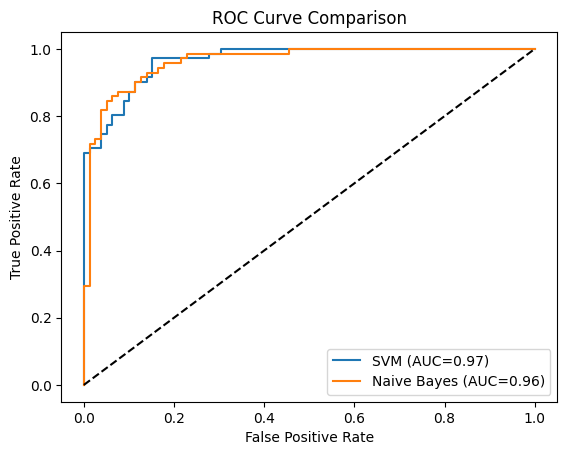

In [11]:
#27 Plot ROC Curves for SVM and Naïve Bayes on a Binary Dataset.

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Binary dataset
X, y = make_classification(n_samples=500, n_features=10,
                           n_classes=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train models
svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train, y_train)
nb = GaussianNB()
nb.fit(X_train, y_train)

# Probabilities
svm_probs = svm.predict_proba(X_test)[:,1]
nb_probs = nb.predict_proba(X_test)[:,1]

# ROC curves
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_probs)
fpr_nb, tpr_nb, _ = roc_curve(y_test, nb_probs)

plt.plot(fpr_svm, tpr_svm, label='SVM (AUC=%.2f)' % auc(fpr_svm, tpr_svm))
plt.plot(fpr_nb, tpr_nb, label='Naive Bayes (AUC=%.2f)' % auc(fpr_nb, tpr_nb))
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()


In [12]:
#28 Use GridSearchCV to tune SVM hyperparameters (C, gamma, kernel).

from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['rbf', 'linear']
}

grid = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)


Best Parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
Best CV Score: 0.9085714285714286


In [13]:
#29 Perform 5-Fold Cross Validation for Naïve Bayes and SVM.

from sklearn.model_selection import cross_val_score
import numpy as np

svm_scores = cross_val_score(SVC(kernel='linear', random_state=42), X, y, cv=5)
nb_scores = cross_val_score(GaussianNB(), X, y, cv=5)

print("SVM CV Accuracy: %.3f ± %.3f" % (np.mean(svm_scores), np.std(svm_scores)))
print("Naive Bayes CV Accuracy: %.3f ± %.3f" % (np.mean(nb_scores), np.std(nb_scores)))


SVM CV Accuracy: 0.880 ± 0.009
Naive Bayes CV Accuracy: 0.890 ± 0.030


30. Summary – Which model to choose?
 - | Case                           | Recommended Model | Reason                           |
| ------------------------------ | ----------------- | -------------------------------- |
| Small text or categorical data | Naïve Bayes       | Fast & simple baseline           |
| Continuous numeric data        | SVM               | Works well with clear boundaries |
| Need high accuracy + tuning    | SVM               | Kernel & C can be optimized      |
| Quick prototype                | Naïve Bayes       | Minimal training time            |
